In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df = pd.read_csv("Financial_News_Articles_new.csv")

#Aggregate daily (Just double checking)
df_daily = df.groupby("date").agg({
    'y': 'mean'
}).reset_index()

#Smooth y
df_daily['y'] = df_daily['y'].rolling(3).mean()
df_daily = df_daily.dropna().reset_index(drop=True)

#Extract values
y_series = df_daily['y'].values
dates = df_daily['date'].values


In [15]:
split_ratio = 0.8
split_idx = int(len(y_series) * split_ratio)

y_train, y_test = y_series[:split_idx], y_series[split_idx:]
test_dates = dates[split_idx:]


Rolling ARIMA Forecast 

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

history = list(y_train)
rolling_preds = []

for i in range(len(y_test)):
    model = ARIMA(history, order=(4, 1, 2))  # Tune this if needed
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    rolling_preds.append(yhat)
    history.append(y_test[i])


/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/base/mod

In [17]:
mae_roll = mean_absolute_error(y_test, rolling_preds)
rmse_roll = mean_squared_error(y_test, rolling_preds, squared=False)

print("Rolling Forecast MAE:", mae_roll)
print("Rolling Forecast RMSE:", rmse_roll)


Rolling Forecast MAE: 0.003286702313497333
Rolling Forecast RMSE: 0.0045056017949361


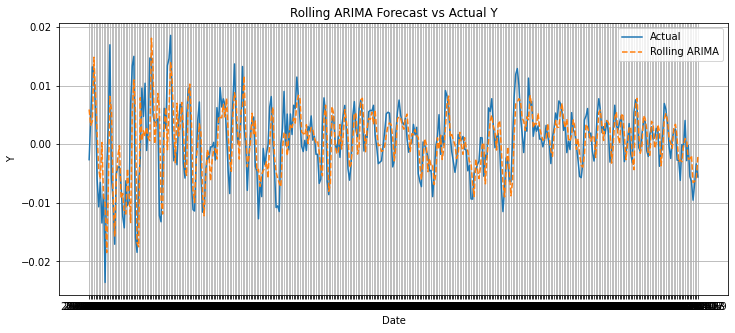

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test, label="Actual")
plt.plot(test_dates, rolling_preds, label="Rolling ARIMA", linestyle='--')
plt.title("Rolling ARIMA Forecast vs Actual Y")
plt.xlabel("Date")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


 Fit non Rolling ARIMA model

In [11]:
model = ARIMA(y_train, order=(4, 1, 2))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())


/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1524
Model:                 ARIMA(4, 1, 2)   Log Likelihood                5153.993
Date:                Wed, 30 Apr 2025   AIC                         -10293.986
Time:                        16:39:48   BIC                         -10256.687
Sample:                             0   HQIC                        -10280.101
                               - 1524                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0745      6.120     -0.012      0.990     -12.070      11.921
ar.L2         -0.0382      0.442     -0.086      0.931      -0.905       0.829
ar.L3         -0.5139      0.317     -1.620      0.1

In [12]:
forecast = model_fit.forecast(steps=len(y_test))

mae = mean_absolute_error(y_test, forecast)
rmse = mean_squared_error(y_test, forecast, squared=False)
print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.007640018186958228
RMSE: 0.009223502796351478


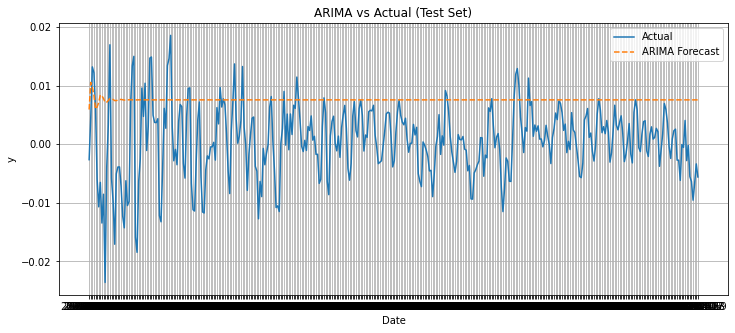

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test, label="Actual")
plt.plot(test_dates, forecast, label="ARIMA Forecast", linestyle='--')
plt.title("ARIMA vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from pmdarima import auto_arima

#Automatically search best (p,d,q)
model_auto = auto_arima(y_train, seasonal=False, trace=True)
print("Best order:", model_auto.order)

#Refit on train
model = ARIMA(y_train, order=model_auto.order)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(y_test))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9519.330, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10171.191, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10005.557, Time=1.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-10214.619, Time=0.89 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-10313.768, Time=0.66 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-10487.023, Time=0.26 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-10485.835, Time=0.30 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-10485.138, Time=1.51 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-10389.795, Time=1.92 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-10488.589, Time=1.67 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-10831.386, Time=2.12 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-10801.217, Time=1.38 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=-10865.251, Time=1.98 sec
 ARIMA(4,0,3)

/opt/anaconda3/envs/myenv_Proj/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
print(forecast[:10])  #Show first 10 ARIMA predictions
print(np.round(np.std(forecast), 6))  #Show how flat it is


[0.00592732 0.01055539 0.00967632 0.00841229 0.0060193  0.0063563
 0.00713696 0.00838903 0.00826924 0.00780432]
0.000243
